# Aims
* Using the SaYo Pillow dataset I seek to derive additional insights Stress Related Sleep Biomarkers.
* To perform initial superficial analysis using EDA and understand the nature of the data.
* To correlate different quantities to form meaningful connections between various parameters for Feature Extraction operations.
* The ultimate goal is to understand the relationship between Parameters like stress levels, number of hours slept and heart rate. For better accuracy, more relevant data may be required.


# 1. Data Preparation

In [1]:
# Importing the libraries
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Let's load the data in our dataframe

df = pd.read_csv("/kaggle/input/human-stress-detection-in-and-through-sleep/SaYoPillow.csv")

In [3]:
df.head()

,sr,rr,t,lm,bo,rem,sr.1,hr,sl
0,93.80,25.680,91.840,16.600,89.840,99.60,1.840,74.20,3
1,91.64,25.104,91.552,15.880,89.552,98.88,1.552,72.76,3
2,60.00,20.000,96.000,10.000,95.000,85.00,7.000,60.00,1
3,85.76,23.536,90.768,13.920,88.768,96.92,0.768,68.84,3
4,48.12,17.248,97.872,6.496,96.248,72.48,8.248,53.12,0


In [4]:
# Let's see the shape of our dataset

df.shape

(630, 9)

In [5]:
# Let's check for missing values

df.isnull().values.sum()

0

In [6]:
# Let's check for duplicates

df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
625    False
626    False
627    False
628    False
629    False
Length: 630, dtype: bool

In [7]:
# Let's see what the datatypes are

df.dtypes

sr      float64
rr      float64
t       float64
lm      float64
bo      float64
rem     float64
sr.1    float64
hr      float64
sl        int64
dtype: object

# 2. Data Credibility Study  


**Looking for Anomalies in the Dataset Using the Benford's Law**
* Benford’s law describes the relative frequency distribution for leading digits of numbers in datasets. Leading digits with smaller values occur more frequently than larger values. This law states that approximately 30% of numbers start with a 1 while less than 5% start with a 9. According to this law, leading 1s appear 6.5 times as often as leading 9s! Benford’s Law is also known as the First Digit Law.
* Analysts have used it extensively to look for fraud and manipulation in financial records, tax returns, applications, and decision-making documents. They compare the distribution of leading digits in these datasets to Benford’s law. 
* The idea behind why this works is straightforward. When people manipulate numbers, they don’t track the frequencies of their fake leading digits, producing an unnatural distribution of leading digits.
* Not all data follow Benford’s law naturally. In those cases, leading digits that follow a different distribution aren’t signs of fraud.
* The SaYo Pillow Dataset has ranges by design. It is tracking human health data and healthy humans have a range in which they showcase these different variables. Although the Benford's Law may not be entirely applicable to this dataset, I am interested in viewing the results.

In [8]:
!pip install benfordslaw

/bin/bash: /opt/conda/lib/libtinfo.so.6: no version information available (required by /bin/bash)
  Preparing metadata (setup.py) ... - done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9675 sha256=4d03c3d868d9abb4f9e02c0745a76b1a21cffd90b02f6d89aa738ae436b43855
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget


[ 93.8    91.64   60.     85.76   48.12   56.88   47.     50.     45.28
  55.52   73.44   59.28   48.6    96.288  87.8    52.32   52.64   86.24
  81.56   63.68   77.6    77.28   69.76   88.04   89.96   53.68   78.56
  50.96   94.76   62.08   49.12   96.256  47.68   99.904  60.     86.72
  48.48   98.528  46.12   98.72   60.96   65.6    75.36   49.28   73.28
  98.912  62.88   97.664  56.72   96.576  49.6    53.6    93.2    46.84
  56.08   75.68   97.536  92.84   87.56   58.48   98.336  81.08   46.6
  61.6    96.448  50.24   49.92   60.48   99.136  48.28   50.48   96.192
  57.68   45.16   48.68   98.016  96.8    56.48   90.08   96.     50.64
  50.56   53.92   96.672  68.32   54.88   52.4    51.6    92.48   98.24
  65.12   86.6    68.     99.808  45.2    63.2    98.272  75.2    76.96
  80.     99.616  97.216  45.04   97.376  53.52   61.44   62.24   79.2
  96.96   54.4    68.96   96.608  47.44   90.56   66.88   97.92   68.64
  76.     49.52   54.96   55.28   90.32   97.312  58.08   83.6   

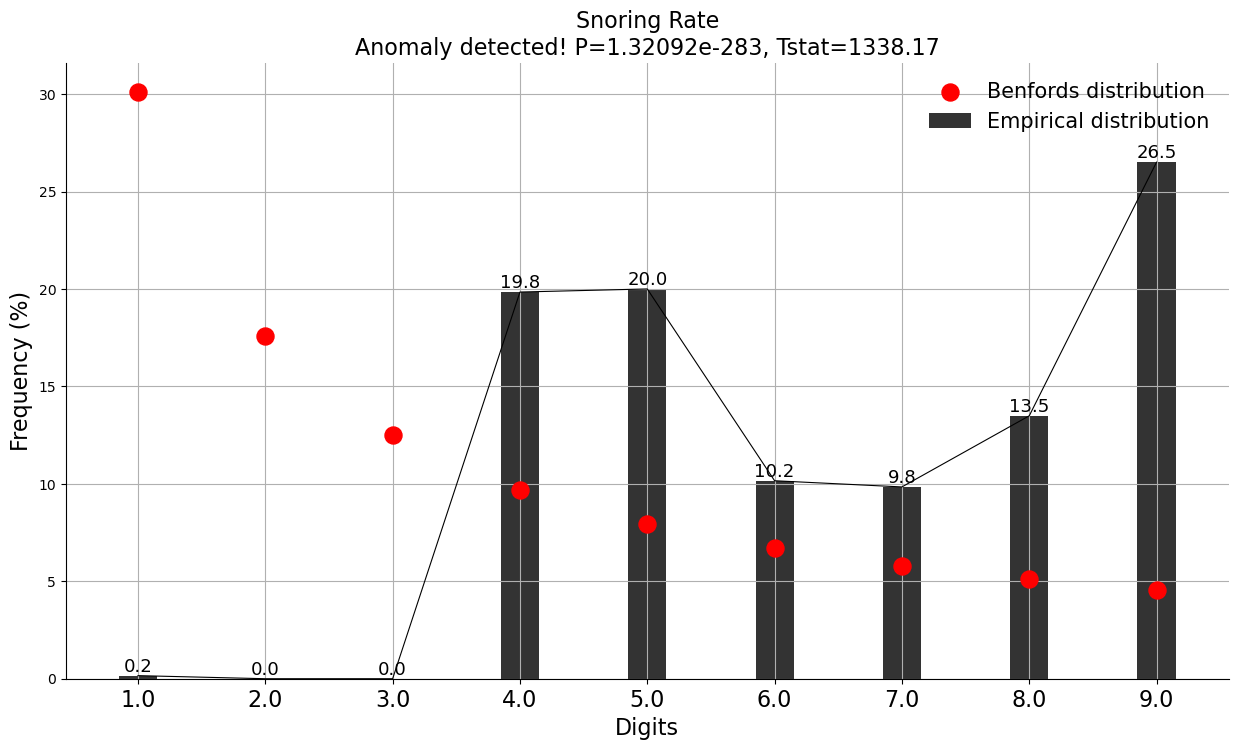

[25.68  25.104 20.    23.536 17.248 19.376 16.8   18.    16.112 19.104
 21.344 19.856 17.44  26.288 24.08  18.464 18.528 23.664 22.416 20.368
 21.76  21.728 20.976 24.144 24.656 18.736 21.856 18.192 25.936 20.208
 17.648 26.256 17.072 29.904 20.    23.792 17.392 28.528 16.448 28.72
 20.096 20.56  21.536 17.712 21.328 28.912 20.288 27.664 19.344 26.576
 17.84  18.72  25.52  16.736 19.216 21.568 27.536 25.424 24.016 19.696
 28.336 22.288 16.64  20.16  26.448 18.048 17.968 20.048 29.136 17.312
 18.096 26.192 19.536 16.064 17.472 28.016 26.8   19.296 24.688 26.
 18.128 18.112 18.784 26.672 20.832 18.976 18.48  18.32  25.328 28.24
 20.512 23.76  20.8   29.808 16.08  20.32  28.272 21.52  21.696 22.
 29.616 27.216 16.016 27.376 18.704 20.144 20.224 21.92  26.96  18.88
 20.896 26.608 16.976 24.816 20.688 27.92  20.864 21.6   17.808 18.992
 19.056 24.752 27.312 19.616 22.96  28.112 28.208 20.576 19.44  27.568
 20.88  17.12  27.184 25.392 19.936 17.424 17.344 21.808 26.736 17.088
 21.136 22.384 

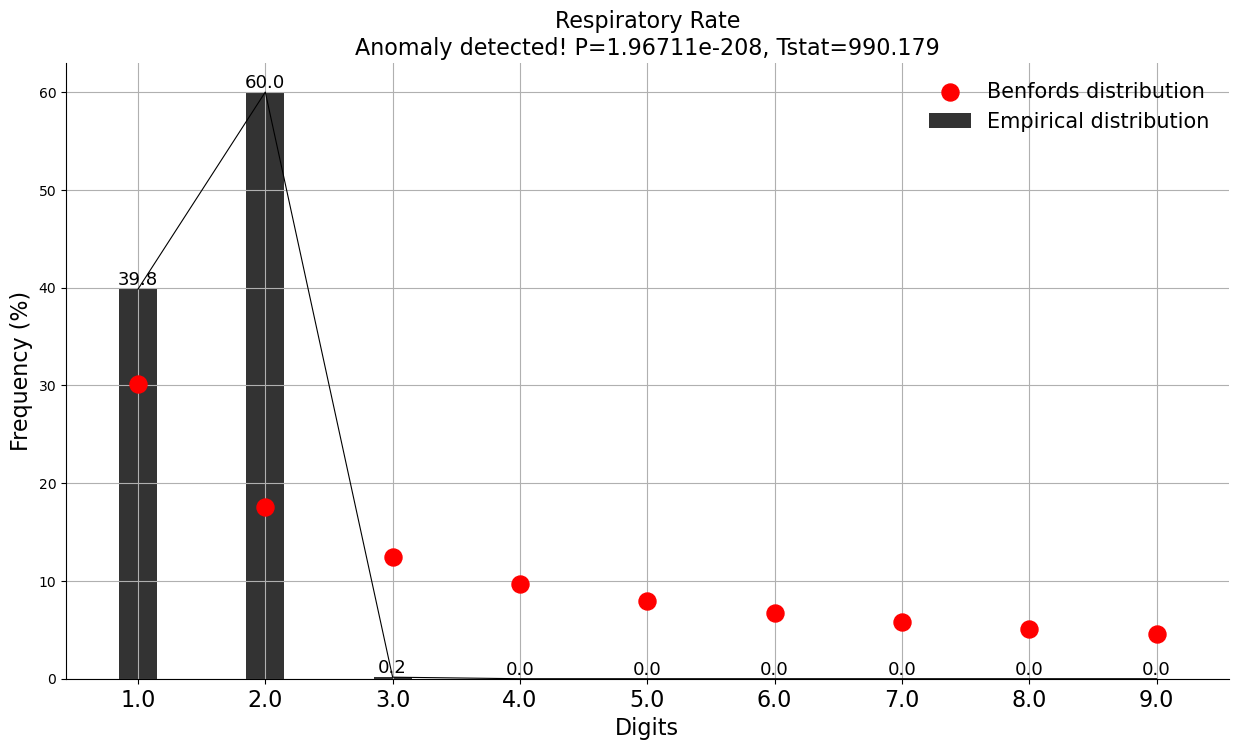

[91.84  91.552 96.    90.768 97.872 95.376 97.2   99.    96.168 95.104
 93.344 95.856 98.16  85.36  91.04  94.464 94.528 90.832 90.208 92.368
 93.76  93.728 92.976 91.072 91.328 94.736 93.856 94.192 91.968 92.208
 98.472 85.32  97.608 89.88  92.    90.896 98.088 88.16  96.672 88.4
 92.096 92.56  93.536 98.568 93.328 88.64  92.288 87.08  95.344 85.72
 98.76  94.72  91.76  97.104 95.216 93.568 86.92  91.712 91.008 95.696
 87.92  90.144 96.96  92.16  85.56  94.048 98.952 92.048 88.92  97.968
 94.096 85.24  95.536 96.096 98.208 87.52  86.    95.296 91.344 85.
 94.128 94.112 94.784 85.84  92.832 94.976 94.48  94.32  91.664 87.8
 92.512 90.88  92.8   89.76  96.12  92.32  87.84  93.52  93.696 90.
 89.52  86.52  96.024 86.72  94.704 92.144 92.224 93.92  86.2   94.88
 92.896 85.76  97.464 91.408 92.688 87.4   92.864 93.6   98.712 94.992
 95.056 91.376 86.64  95.616 90.48  87.64  87.76  92.576 95.44  86.96
 92.88  97.68  86.48  91.696 95.936 98.136 98.016 93.808 85.92  97.632
 93.136 90.192 93.8

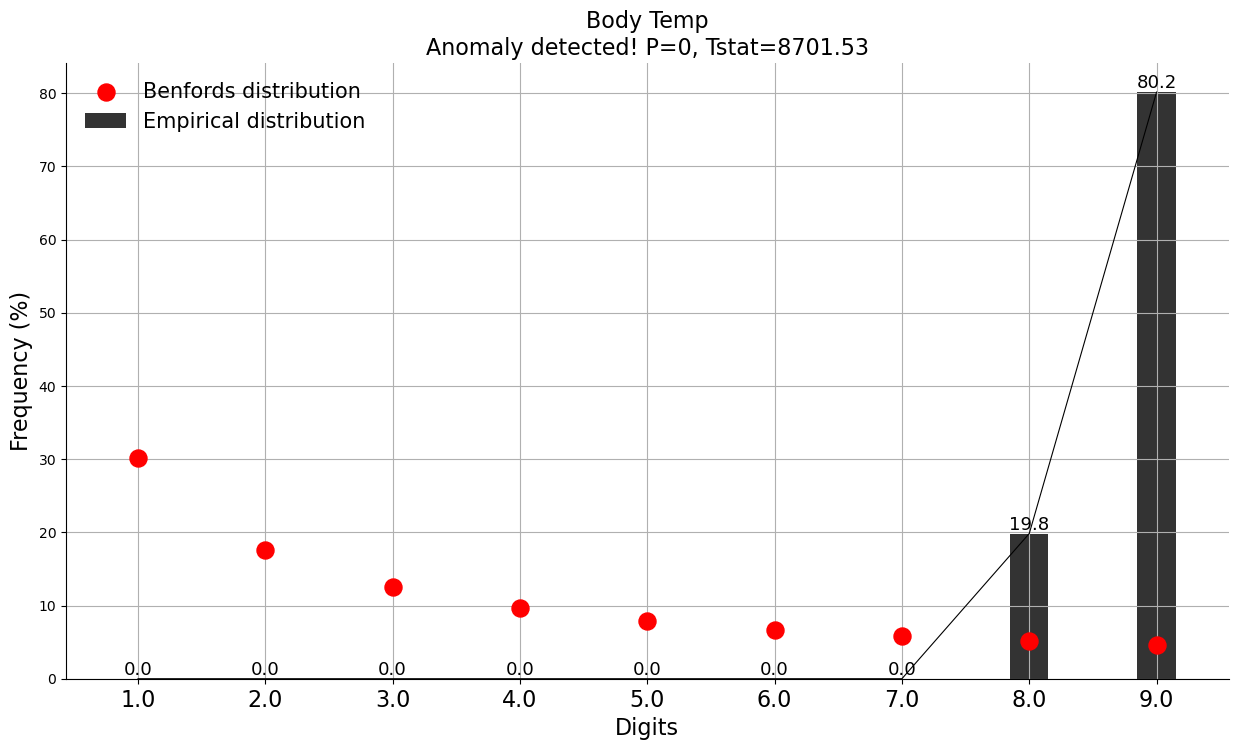

[16.6   15.88  10.    13.92   6.496  9.376  5.6    8.     4.224  9.104
 11.344  9.856  6.88  17.144 14.6    8.464  8.528 14.08  12.52  10.368
 11.76  11.728 10.976 14.68  15.32   8.736 11.856  8.192 16.92  10.208
  7.296 17.128  6.144 18.952 10.    14.24   6.784 18.264  4.896 18.36
 10.096 10.56  11.536  7.424 11.328 18.456 10.288 17.832  9.344 17.288
  7.68   8.72  16.4    5.472  9.216 11.568 17.768 16.28  14.52   9.696
 18.168 12.36   5.28  10.16  17.224  8.048  7.936 10.048 18.568  6.624
  8.096 17.096  9.536  4.128  6.944 18.008 17.4    9.296 15.36  17.
  8.128  8.112  8.784 17.336 10.832  8.976  8.48   8.32  16.16  18.12
 10.512 14.2   10.8   18.904  4.16  10.32  18.136 11.52  11.696 12.
 18.808 17.608  4.032 17.688  8.704 10.144 10.224 11.92  17.48   8.88
 10.896 17.304  5.952 15.52  10.688 17.96  10.864 11.6    7.616  8.992
  9.056 15.44  17.656  9.616 13.2   18.056 18.104 10.576  9.44  17.784
 10.88   6.24  17.592 16.24   9.936  6.848  6.688 11.808 17.368  6.176
 11.136 12.48  

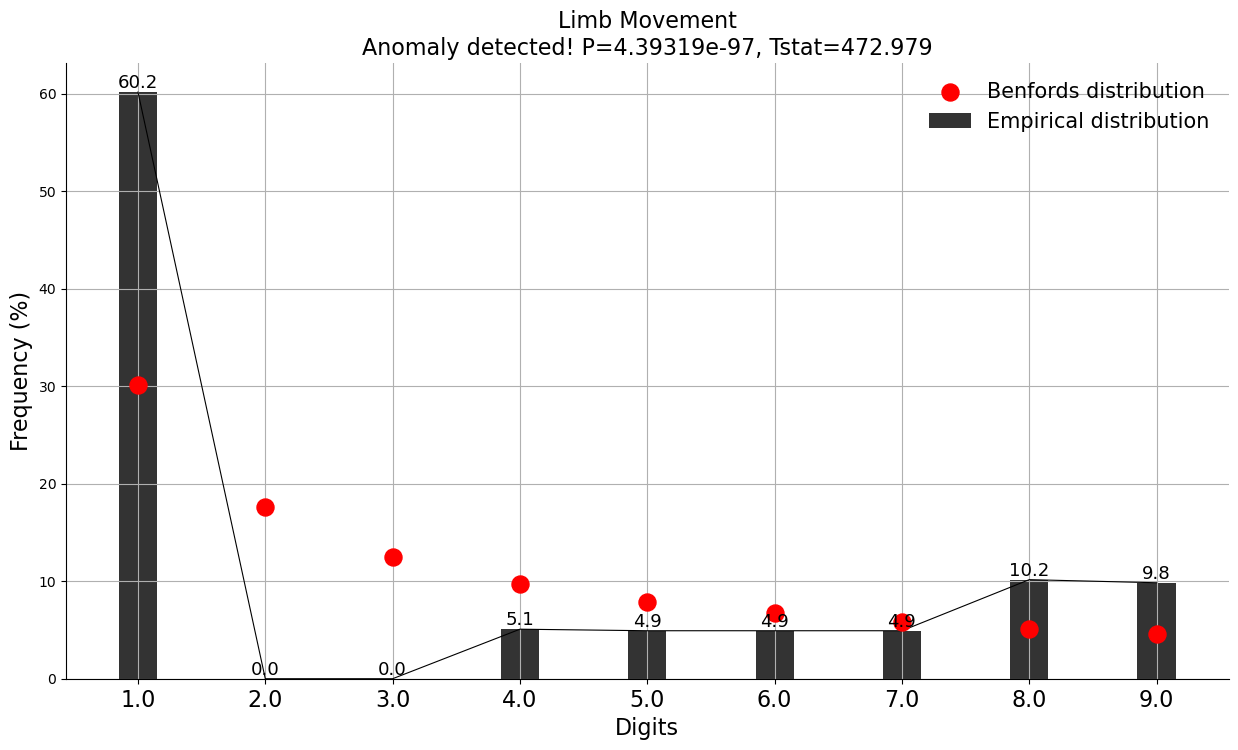

[89.84  89.552 95.    88.768 96.248 94.064 95.8   97.    95.112 93.656
 91.344 94.784 96.44  82.432 89.04  92.696 92.792 88.832 88.208 90.368
 91.76  91.728 90.976 89.072 89.328 93.104 91.856 92.288 89.968 90.208
 96.648 82.384 96.072 87.856 90.    88.896 96.392 85.792 95.448 86.08
 90.096 90.56  91.536 96.712 91.328 86.368 90.288 84.496 94.016 82.864
 96.84  93.08  89.76  95.736 93.824 91.568 84.304 89.712 89.008 94.544
 85.504 88.144 95.64  90.16  82.672 92.072 96.968 90.048 86.704 96.312
 92.144 82.288 94.304 95.064 96.472 85.024 83.2   93.944 89.344 82.
 92.192 92.168 93.176 83.008 90.832 93.464 92.72  92.48  89.664 85.36
 90.512 88.88  90.8   87.712 95.08  90.32  85.408 91.52  91.696 88.
 87.424 83.824 95.016 84.064 93.056 90.144 90.224 91.92  83.44  93.32
 90.896 82.912 95.976 89.408 90.688 84.88  90.864 91.6   96.808 93.488
 93.584 89.376 83.968 94.424 88.48  85.168 85.312 90.576 94.16  84.352
 90.88  96.12  83.776 89.696 94.904 96.424 96.344 91.808 83.104 96.088
 91.136 88.192 

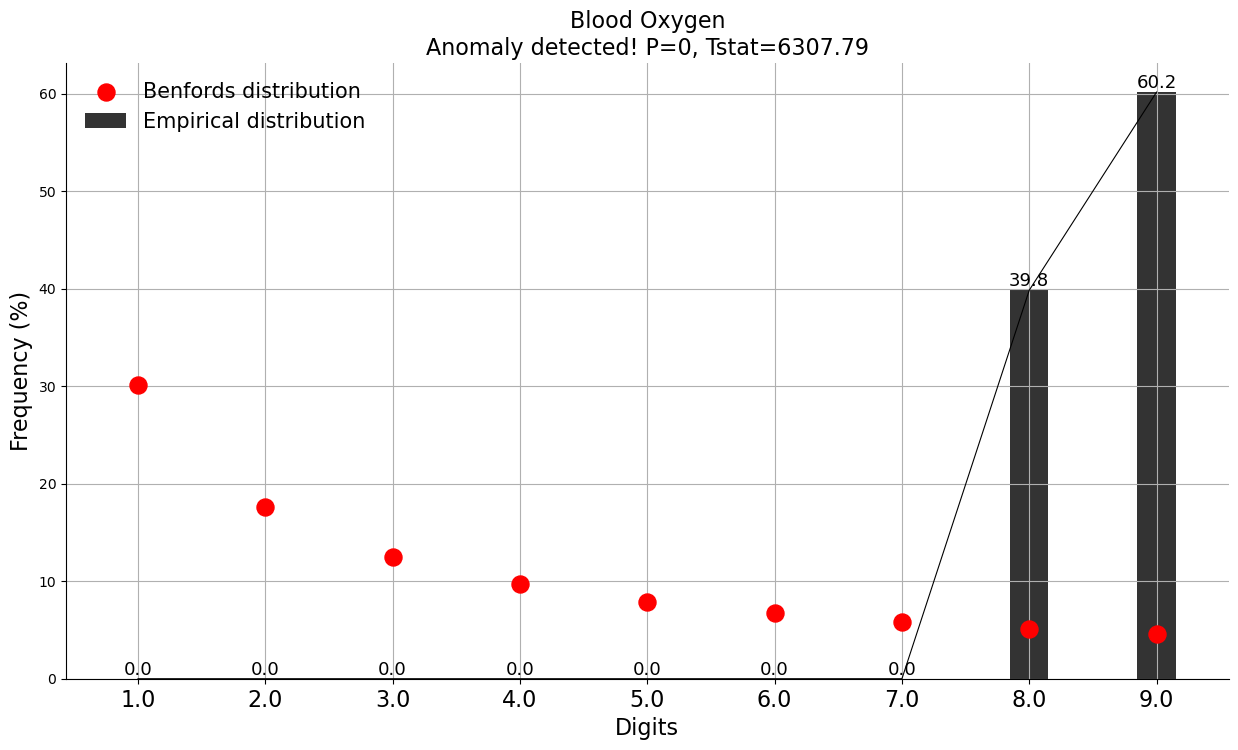

[ 99.6   98.88  85.    96.92  72.48  83.44  68.    80.    61.12  82.76
  91.72  84.64  74.4  100.36  97.6   81.16  81.32  97.08  95.52  86.84
  93.8   93.64  89.88  97.68  98.32  81.84  94.28  80.48  99.92  86.04
  76.48 100.32  70.72 104.88  85.    97.24  73.92 103.16  64.48 103.4
  85.48  87.8   92.68  77.12  91.64 103.64  86.44 102.08  83.36 100.72
  78.4   81.8   99.4   67.36  83.04  92.84 101.92  99.28  97.52  84.24
 102.92  95.36  66.4   85.8  100.56  80.12  79.68  85.24 103.92  73.12
  80.24 100.24  83.84  60.64  74.72 102.52 101.    83.24  98.36 100.
  80.32  80.28  81.96 100.84  89.16  82.44  81.2   80.8   99.16 102.8
  87.56  97.2   89.   104.76  60.8   86.6  102.84  92.6   93.48  95.
 104.52 101.52  60.16 101.72  81.76  85.72  86.12  94.6  101.2   82.2
  89.48 100.76  69.76  98.52  88.44 102.4   89.32  93.    78.08  82.48
  82.64  98.44 101.64  84.04  96.2  102.64 102.76  87.88  83.6  101.96
  89.4   71.2  101.48  99.24  84.84  74.24  73.44  94.04 100.92  70.88
  90.68  95.4

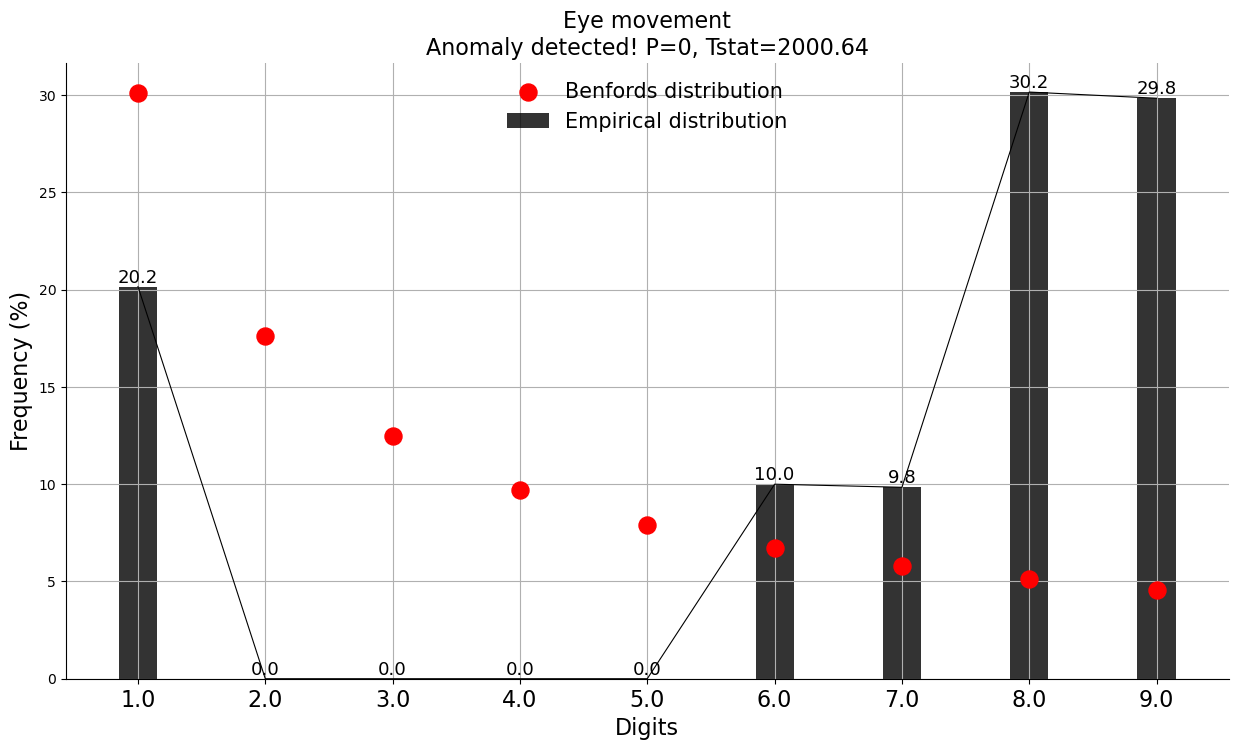

[ 99.6   98.88  85.    96.92  72.48  83.44  68.    80.    61.12  82.76
  91.72  84.64  74.4  100.36  97.6   81.16  81.32  97.08  95.52  86.84
  93.8   93.64  89.88  97.68  98.32  81.84  94.28  80.48  99.92  86.04
  76.48 100.32  70.72 104.88  85.    97.24  73.92 103.16  64.48 103.4
  85.48  87.8   92.68  77.12  91.64 103.64  86.44 102.08  83.36 100.72
  78.4   81.8   99.4   67.36  83.04  92.84 101.92  99.28  97.52  84.24
 102.92  95.36  66.4   85.8  100.56  80.12  79.68  85.24 103.92  73.12
  80.24 100.24  83.84  60.64  74.72 102.52 101.    83.24  98.36 100.
  80.32  80.28  81.96 100.84  89.16  82.44  81.2   80.8   99.16 102.8
  87.56  97.2   89.   104.76  60.8   86.6  102.84  92.6   93.48  95.
 104.52 101.52  60.16 101.72  81.76  85.72  86.12  94.6  101.2   82.2
  89.48 100.76  69.76  98.52  88.44 102.4   89.32  93.    78.08  82.48
  82.64  98.44 101.64  84.04  96.2  102.64 102.76  87.88  83.6  101.96
  89.4   71.2  101.48  99.24  84.84  74.24  73.44  94.04 100.92  70.88
  90.68  95.4

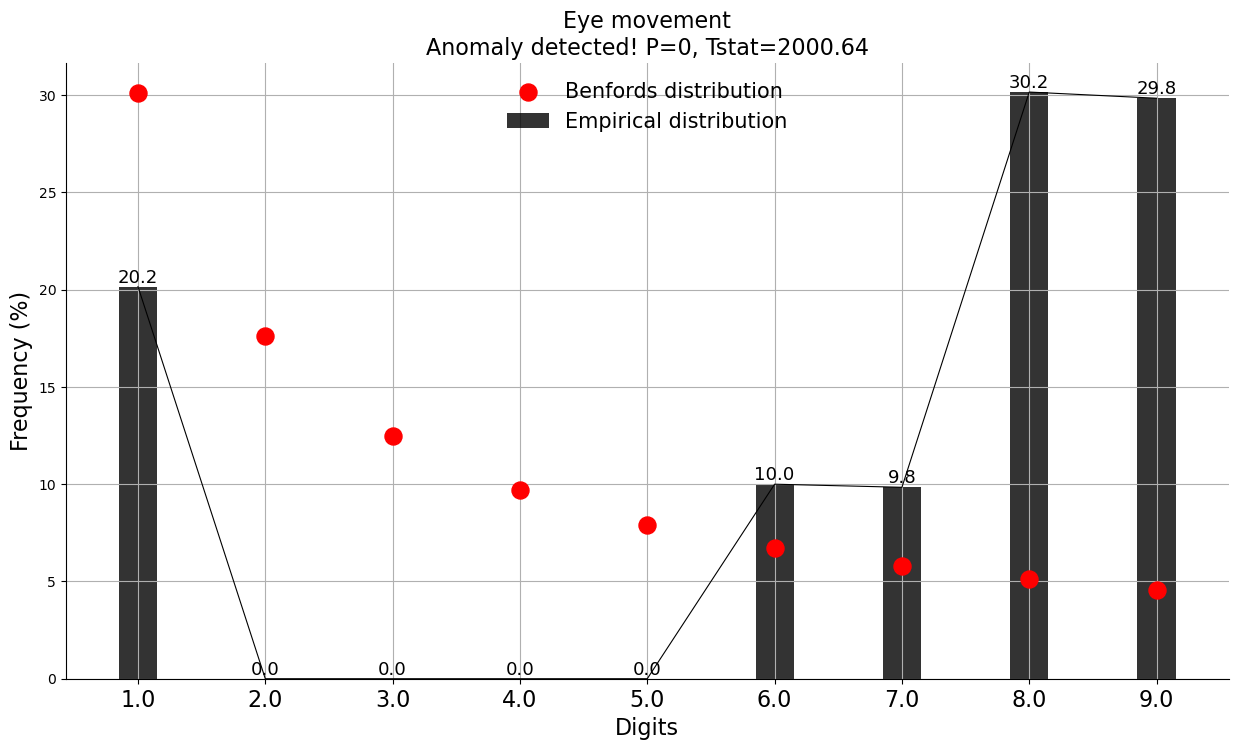

[1.84  1.552 7.    0.768 8.248 6.376 7.8   9.    7.112 6.104 4.016 6.856
 8.44  0.    1.04  5.464 5.528 0.832 0.208 2.552 4.64  4.592 3.464 1.072
 1.328 5.736 4.784 5.192 1.968 2.312 8.648 0.    8.072 0.    2.    0.896
 8.392 0.    7.448 0.    2.144 2.84  4.304 8.712 3.992 0.    2.432 0.
 6.344 0.    8.84  5.72  1.76  7.736 6.216 4.352 0.    1.712 1.008 6.696
 0.    0.144 7.64  2.24  0.    5.048 8.968 2.072 0.    8.312 5.096 0.
 6.536 7.064 8.472 0.    0.    6.296 1.344 0.    5.128 5.112 5.784 0.
 3.248 5.976 5.48  5.32  1.664 0.    2.768 0.88  3.2   0.    7.08  2.48
 0.    4.28  4.544 0.    0.    0.    7.016 0.    5.704 2.216 2.336 4.88
 0.    5.88  3.344 0.    7.976 1.408 3.032 0.    3.296 4.4   8.808 5.992
 6.056 1.376 0.    6.616 0.48  0.    0.    2.864 6.44  0.    3.32  8.12
 0.    1.696 6.936 8.424 8.344 4.712 0.    8.088 3.704 0.192 4.76  8.728
 3.272 7.768 8.504 7.032 7.048 5.064 1.136 8.152 0.    0.    8.6   2.696
 1.776 4.184 0.    0.    0.    3.584 6.152 2.912 0.    4.52  7.

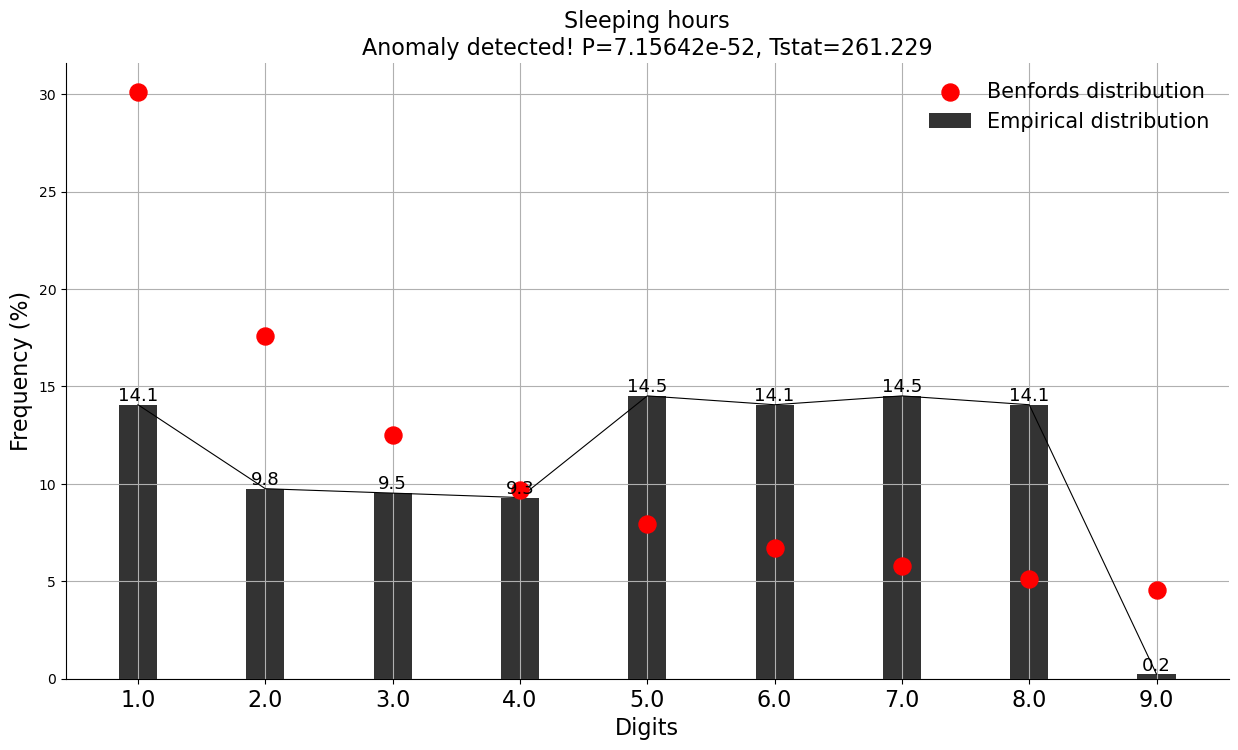

[74.2  72.76 60.   68.84 53.12 58.44 52.   55.   50.28 57.76 63.36 59.64
 53.6  75.72 70.2  56.16 56.32 69.16 66.04 60.92 64.4  64.32 62.44 70.36
 71.64 56.84 64.64 55.48 74.84 60.52 54.12 75.64 52.68 84.76 60.   69.48
 53.48 81.32 51.12 81.8  60.24 61.4  63.84 54.28 63.32 82.28 60.72 79.16
 58.36 76.44 54.6  56.8  73.8  51.84 58.04 63.92 78.84 73.56 70.04 59.24
 80.84 65.72 51.6  60.4  76.12 55.12 54.92 60.12 82.84 53.28 55.24 75.48
 58.84 50.16 53.68 80.04 77.   58.24 71.72 75.   55.32 55.28 56.96 76.68
 62.08 57.44 56.2  55.8  73.32 80.6  61.28 69.4  62.   84.52 50.2  60.8
 80.68 63.8  64.24 65.   84.04 78.04 50.04 78.44 56.76 60.36 60.56 64.8
 77.4  57.2  62.24 76.52 52.44 72.04 61.72 79.8  62.16 64.   54.52 57.48
 57.64 71.88 78.28 59.04 67.4  80.28 80.52 61.44 58.6  78.92 62.2  52.8
 77.96 73.48 59.84 53.56 53.36 64.52 76.84 52.72 62.84 65.96 64.6  54.32
 62.12 51.92 53.76 50.08 50.12 55.16 70.68 52.88 77.16 75.24 54.   61.16
 73.88 63.64 75.8  81.96 82.2  62.64 57.88 61.52 83.48

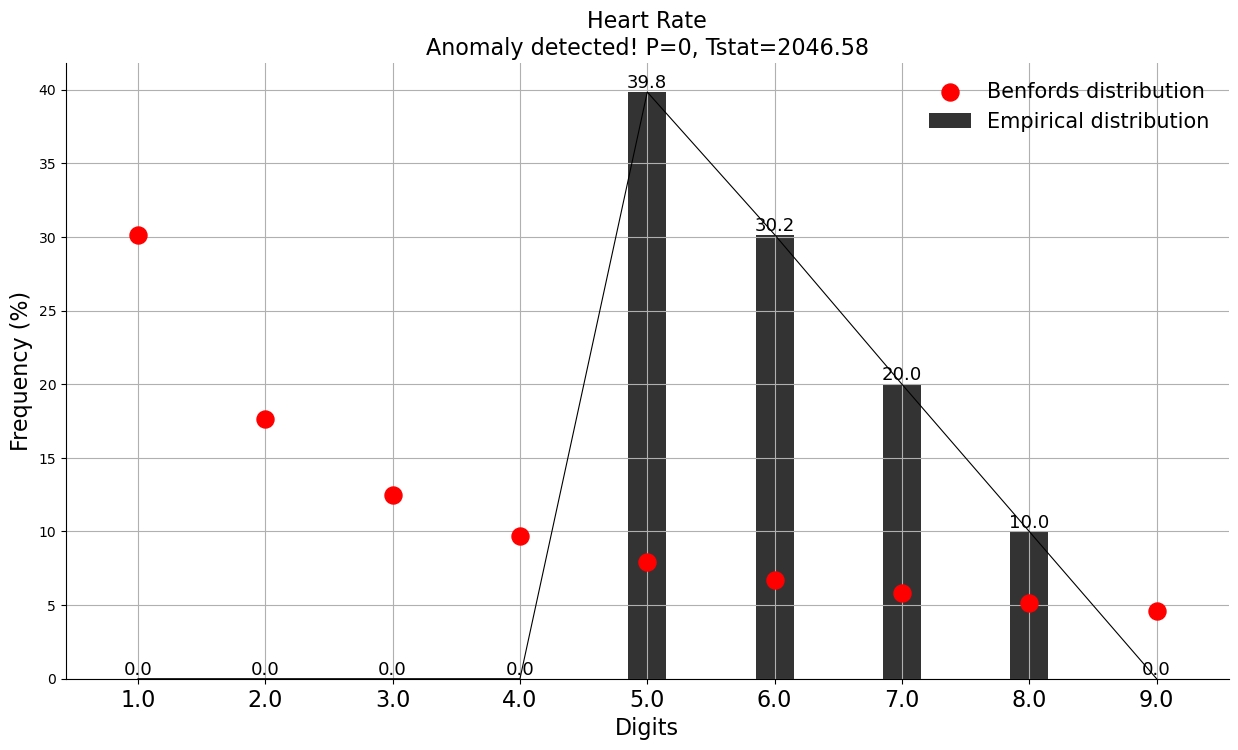

(<Figure size 1500x800 with 1 Axes>,
 <AxesSubplot:title={'center':'Heart Rate\nAnomaly detected! P=0, Tstat=2046.58'}, xlabel='Digits', ylabel='Frequency (%)'>)

In [9]:
# Let's use the Benford's Law to check for any anomalies in our dataset
from benfordslaw import benfordslaw
bl = benfordslaw()
X = df['sr'].values
print(X)
results = bl.fit(X)
bl.plot(title='Snoring Rate')

from benfordslaw import benfordslaw
bl = benfordslaw()
X = df['rr'].values
print(X)
results = bl.fit(X)
bl.plot(title='Respiratory Rate')

from benfordslaw import benfordslaw
bl = benfordslaw()
X = df['t'].values
print(X)
results = bl.fit(X)
bl.plot(title='Body Temp')

from benfordslaw import benfordslaw
bl = benfordslaw()
X = df['lm'].values
print(X)
results = bl.fit(X)
bl.plot(title='Limb Movement')

from benfordslaw import benfordslaw
bl = benfordslaw()
X = df['bo'].values
print(X)
results = bl.fit(X)
bl.plot(title='Blood Oxygen')

from benfordslaw import benfordslaw
bl = benfordslaw()
X = df['rem'].values
print(X)
results = bl.fit(X)
bl.plot(title='Eye movement')

from benfordslaw import benfordslaw
bl = benfordslaw()
X = df['rem'].values
print(X)
results = bl.fit(X)
bl.plot(title='Eye movement')

from benfordslaw import benfordslaw
bl = benfordslaw()
X = df['sr.1'].values
print(X)
results = bl.fit(X)
bl.plot(title='Sleeping hours')

from benfordslaw import benfordslaw
bl = benfordslaw()
X = df['hr'].values
print(X)
results = bl.fit(X)
bl.plot(title='Heart Rate')

### While the graph contains some anomalies, we might consider it with a pinch of salt because the majority of the variables in this dataset are limited to typical human ranges hence a starting point for our analysis.

# 3. Correlation between Individual Parameters

In [10]:
import seaborn as sns

**A. How does Hours slept daily affect the Stress level?**

Text(0, 0.5, 'Sleep hours')

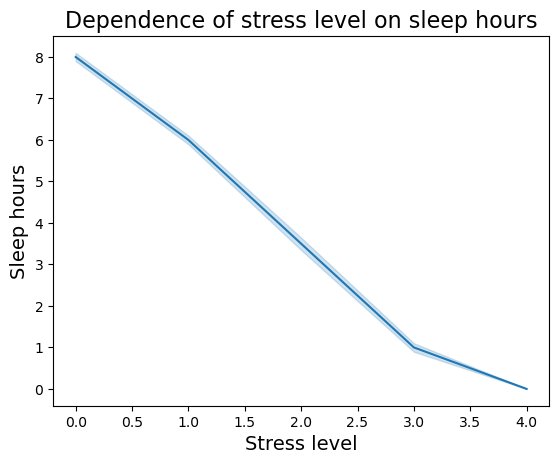

In [11]:
sleep_hours_plot = sns.lineplot(data=df, x='sl',y='sr.1')
sleep_hours_plot.axes.set_title("Dependence of stress level on sleep hours", fontsize=16)
sleep_hours_plot.set_xlabel("Stress level", fontsize=14)
sleep_hours_plot.set_ylabel("Sleep hours", fontsize=14)

**B. How does Heart Rate measured daily affect the Stress level?**

Text(0, 0.5, 'Heart rate')

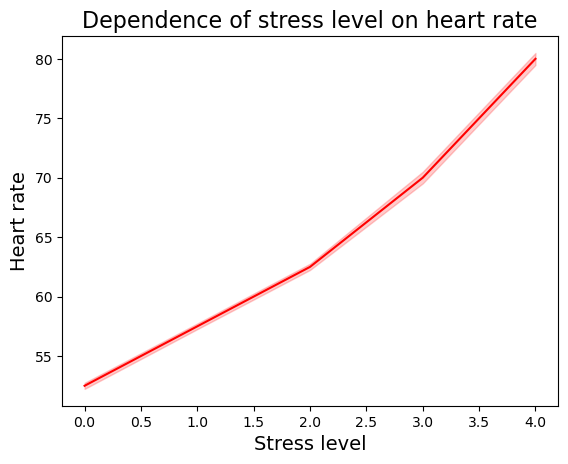

In [12]:
heart_rate_plot = sns.lineplot(data=df, x='sl',y='hr', color='red')
heart_rate_plot.axes.set_title("Dependence of stress level on heart rate", fontsize=16)
heart_rate_plot.set_xlabel("Stress level", fontsize=14)
heart_rate_plot.set_ylabel("Heart rate", fontsize=14)

**C. How does Blood oxygen measured daily affect the Stress level?**

Text(0, 0.5, 'Blood oxygen')

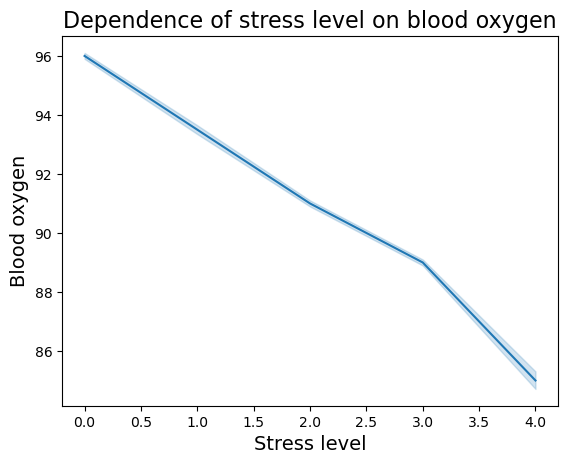

In [13]:
blood_oxygen_plot = sns.lineplot(data=df, x='sl',y='bo')
blood_oxygen_plot.axes.set_title("Dependence of stress level on blood oxygen", fontsize=16)
blood_oxygen_plot.set_xlabel("Stress level", fontsize=14)
blood_oxygen_plot.set_ylabel("Blood oxygen", fontsize=14)

**D. How does Eye movement (REM) during Sleep affect the Stress level?**

Text(0, 0.5, 'eye movement')

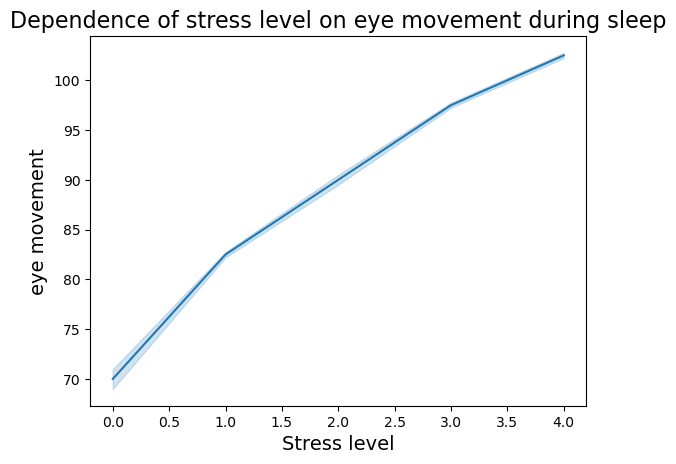

In [14]:
eye_movement_plot = sns.lineplot(data=df, x='sl',y='rem')
eye_movement_plot.axes.set_title("Dependence of stress level on eye movement during sleep", fontsize=16)
eye_movement_plot.set_xlabel("Stress level", fontsize=14)
eye_movement_plot.set_ylabel("eye movement", fontsize=14)

**E. How does Respiratory Rate affect the Stress level?**

Text(0, 0.5, 'Respiratory Rate')

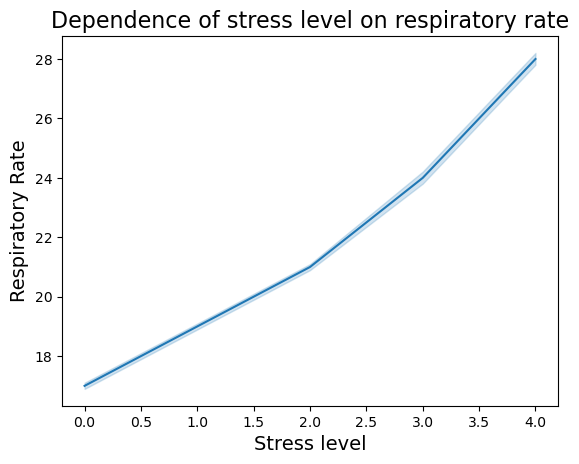

In [15]:
respiration_rate_plot = sns.lineplot(data=df, x='sl',y='rr')
respiration_rate_plot.axes.set_title("Dependence of stress level on respiratory rate", fontsize=16)
respiration_rate_plot.set_xlabel("Stress level", fontsize=14)
respiration_rate_plot.set_ylabel("Respiratory Rate", fontsize=14)

**The complete set of Individual Parameter Correlation for this Dataset using Seaborn is given below -**

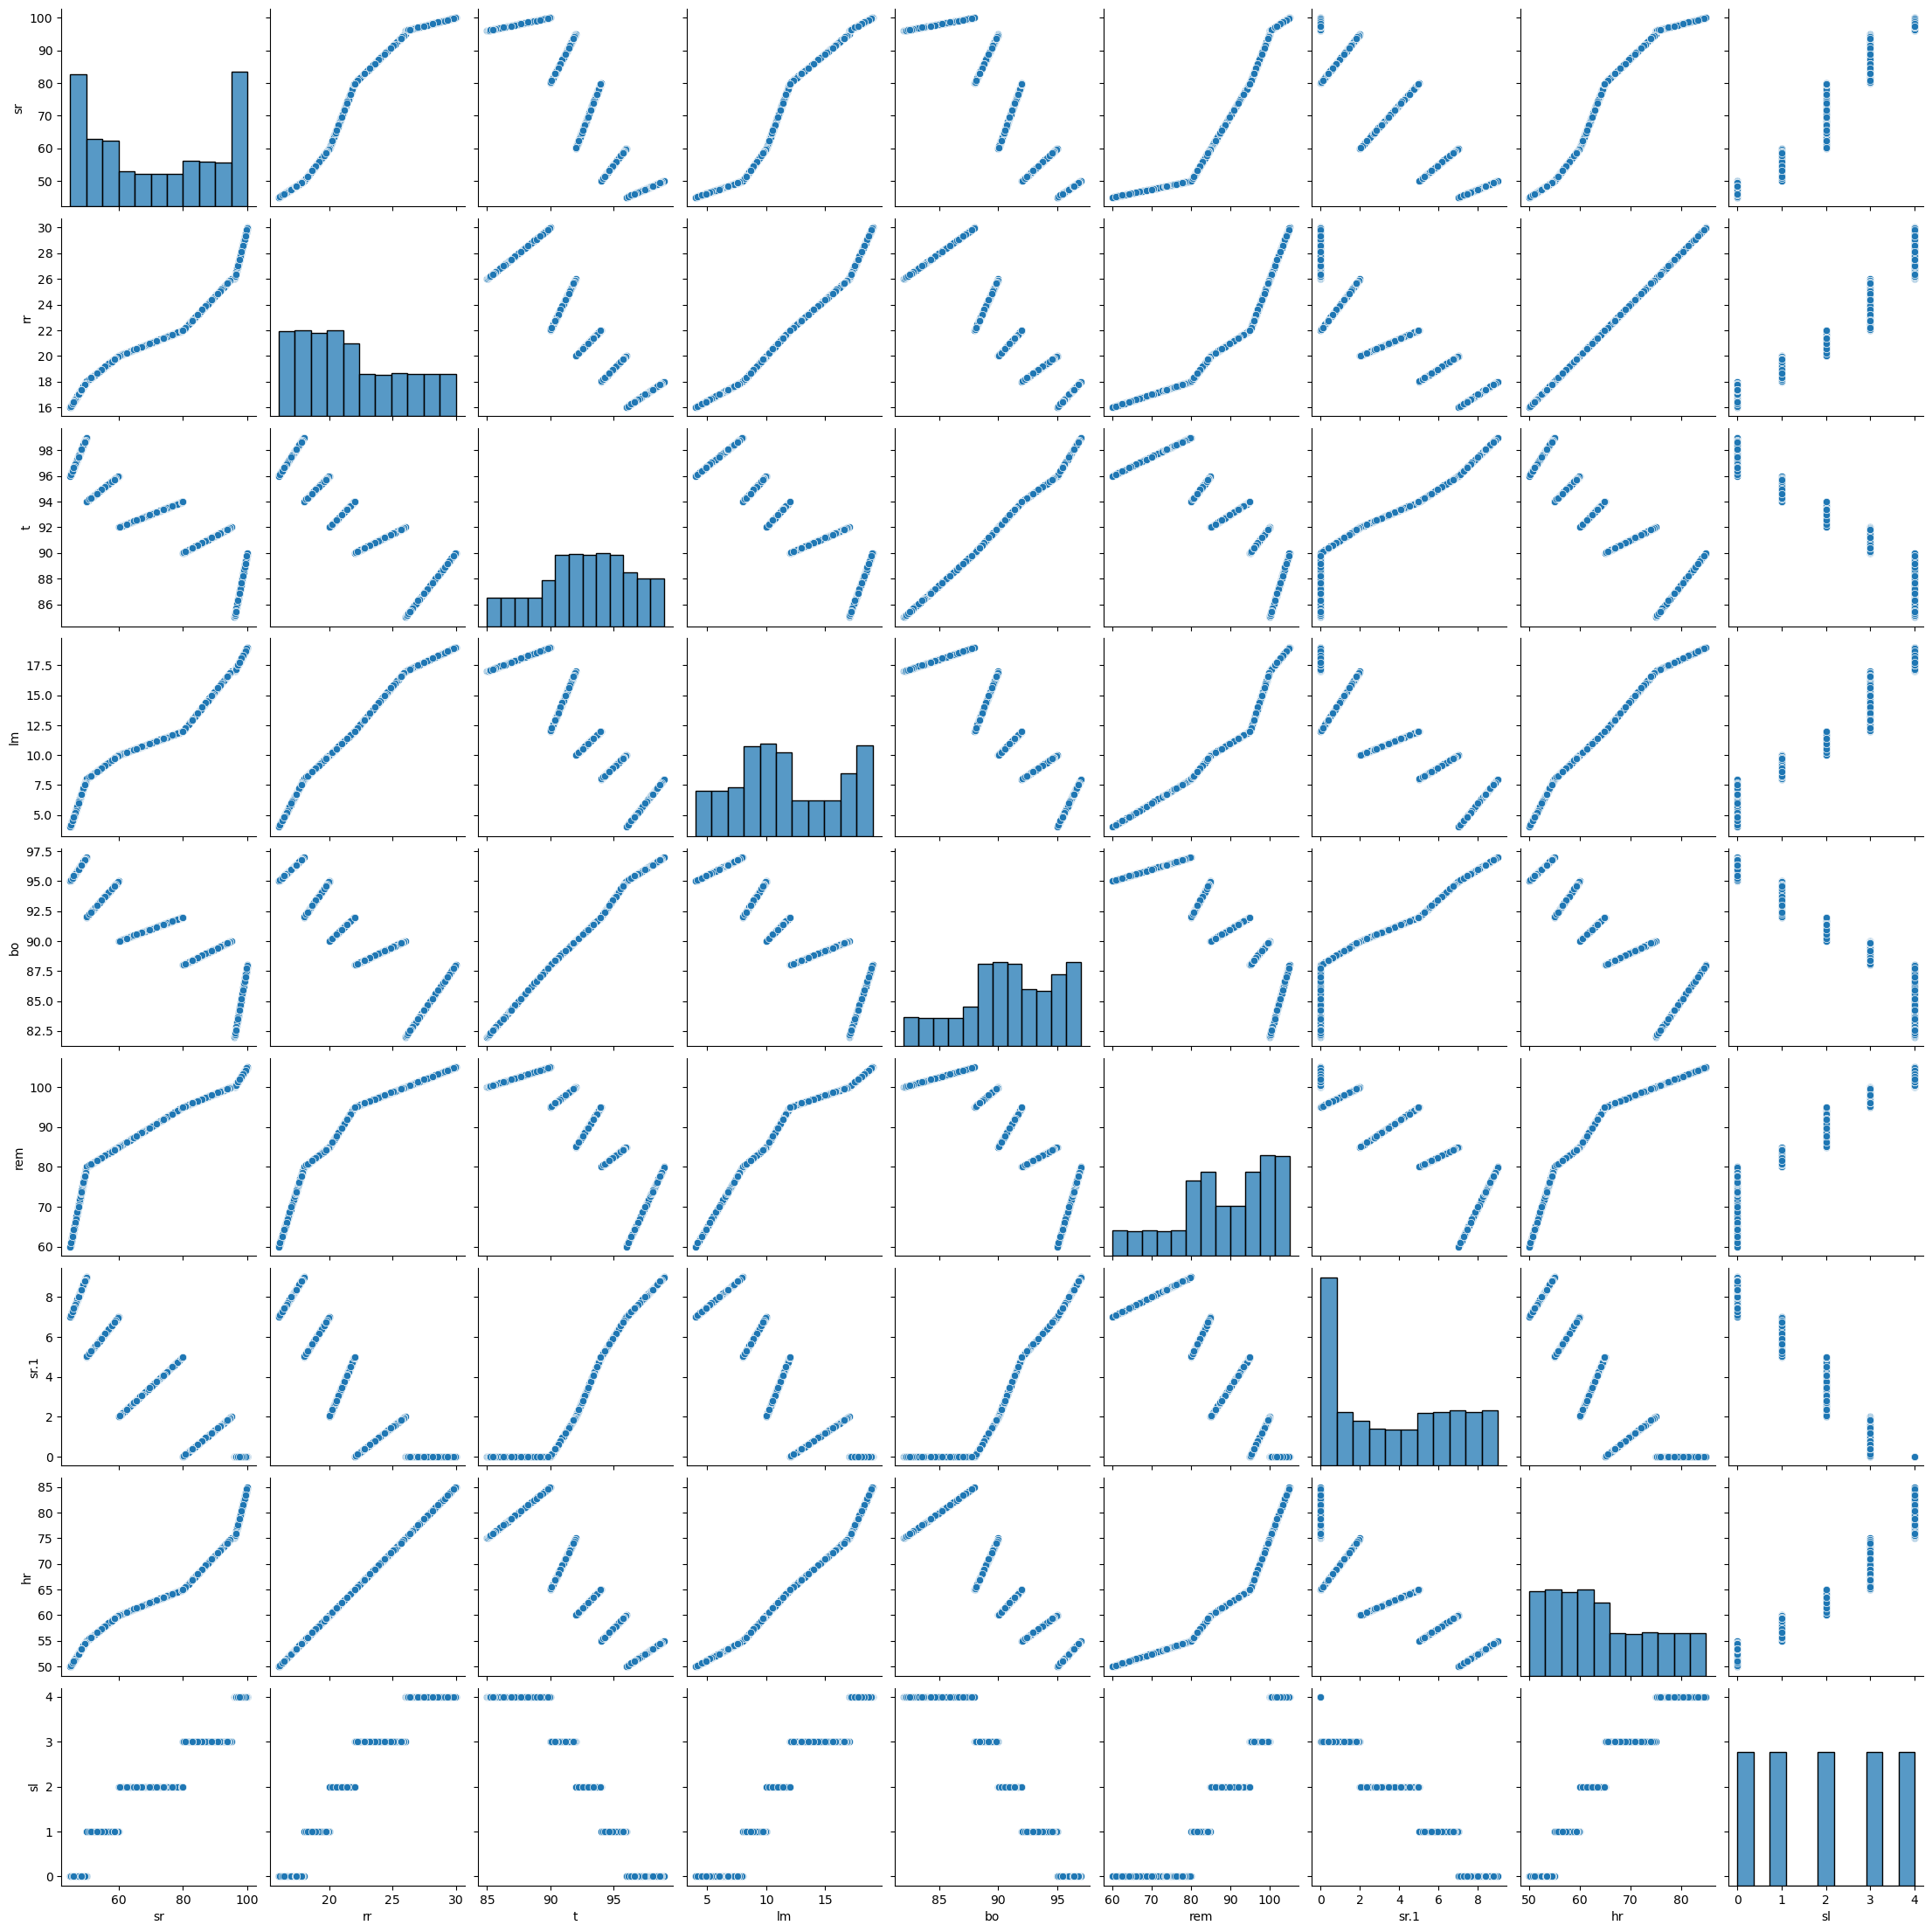

In [16]:
sns.pairplot(df)

# 4. Data Presentation

In [17]:
# Let's change the column names for ease of readability

new_column_names = ["snoring_rate", "respiration", "body_temperature", "limb_movement", "blood_oxygen", "rem",\
                    "sleeping_hours", "heart_rate", "stress_level"]
df.columns = new_column_names
df.head()

,snoring_rate,respiration,body_temperature,limb_movement,blood_oxygen,rem,sleeping_hours,heart_rate,stress_level
0,93.80,25.680,91.840,16.600,89.840,99.60,1.840,74.20,3
1,91.64,25.104,91.552,15.880,89.552,98.88,1.552,72.76,3
2,60.00,20.000,96.000,10.000,95.000,85.00,7.000,60.00,1
3,85.76,23.536,90.768,13.920,88.768,96.92,0.768,68.84,3
4,48.12,17.248,97.872,6.496,96.248,72.48,8.248,53.12,0


In [18]:
# Summary statistics

df.describe()

,snoring_rate,respiration,body_temperature,limb_movement,blood_oxygen,rem,sleeping_hours,heart_rate,stress_level
count,630.000000,630.000000,630.00000,630.000000,630.000000,630.000000,630.000000,630.000000,630.000000
mean,71.600000,21.800000,92.80000,11.700000,90.900000,88.500000,3.700000,64.500000,2.000000
std,19.372833,3.966111,3.52969,4.299629,3.902483,11.893747,3.054572,9.915277,1.415337
min,45.000000,16.000000,85.00000,4.000000,82.000000,60.000000,0.000000,50.000000,0.000000
25%,52.500000,18.500000,90.50000,8.500000,88.500000,81.250000,0.500000,56.250000,1.000000
50%,70.000000,21.000000,93.00000,11.000000,91.000000,90.000000,3.500000,62.500000,2.000000
75%,91.250000,25.000000,95.50000,15.750000,94.250000,98.750000,6.500000,72.500000,3.000000
max,100.000000,30.000000,99.00000,19.000000,97.000000,105.000000,9.000000,85.000000,4.000000


**Findings:**
* People slept 3.7 hours on average in the study
* People scored '2' on stress levels on an average
* Stress level ranged from '0' to '4'
* Standard Deviation from mean score of '2' was +/- 1.4 on either side
* The average heart rate of the subjects is 64bpm.
* The average respiration rate of the subjects is 22 breaths per min.

# 5. Correlation Plot - Relating between multiple parameters

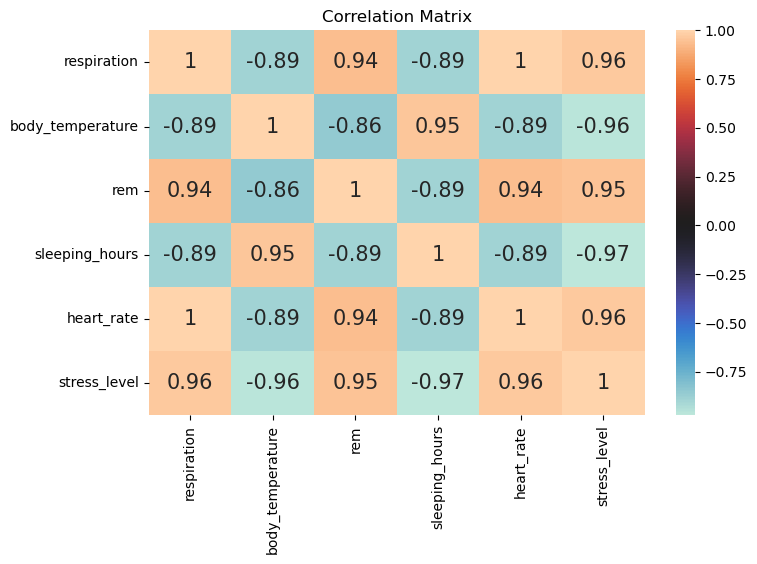

In [19]:
#Let's plot a correlation matrix

fig, ax = plt.subplots(figsize=(8,5))

cols=["respiration", "body_temperature", "rem", "sleeping_hours", "heart_rate", "stress_level"]
sns.heatmap(df[cols].corr(), cmap="icefire", annot=True, annot_kws={'size': 15})

plt.title("Correlation Matrix")
plt.show()

# 6. What do we Infer? - Important Takeaways

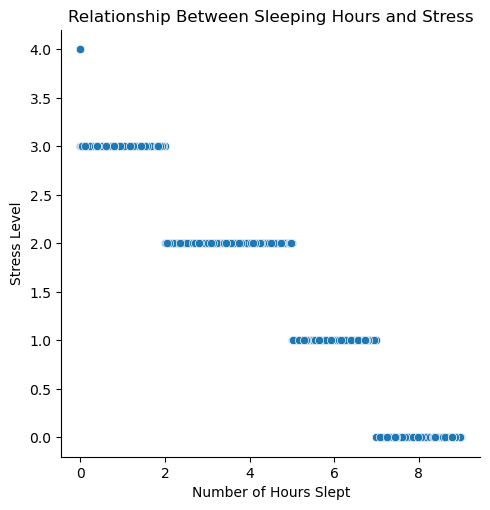

In [20]:
# Let's see the relationship between sleeping hours and stress

sns.relplot(x="sleeping_hours", y="stress_level", data=df, kind="scatter")
plt.xlabel("Number of Hours Slept")
plt.ylabel("Stress Level")
plt.title("Relationship Between Sleeping Hours and Stress")
plt.show()

**What's the relationship between sleep and stress?**
* Stress Levels and Sleeping Hours are strongly negatively correlated. The more people sleep, the less they are likely to be stressed

* Here we can clearly spot the negative correlation between Stress Level (as a category variable type) and Number of Hours Slept (as a continuous variable). 

* People who sleep atleast 7 to 8 hours experience none or minimal stress level.

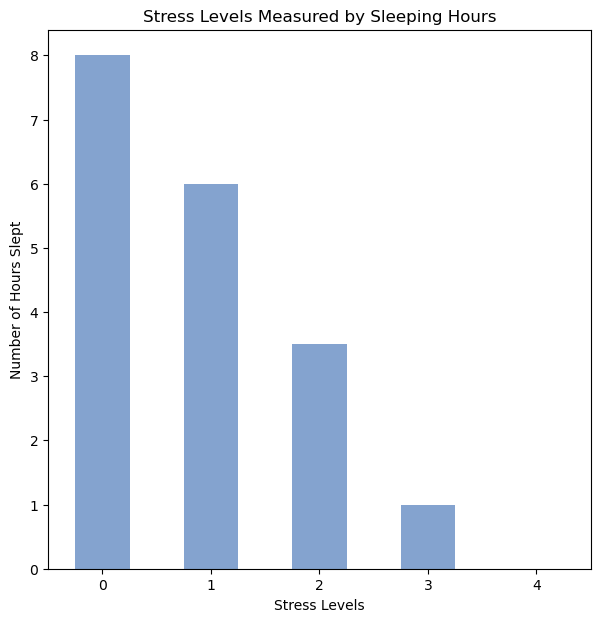

In [21]:
# Let's plot bar chart

fig, ax = plt.subplots(figsize=(7,7))
df.groupby(df["stress_level"])["sleeping_hours"].mean().plot(kind='bar', rot=0, color='#84a3cf')
plt.title("Stress Levels Measured by Sleeping Hours")
plt.xlabel("Stress Levels")
plt.ylabel("Number of Hours Slept")
plt.show()

**How many hours should people sleep on an average to maintain low stress levels and vice versa?**
* People who sleep 8 hours on average in a single day report no or very low stress levels. Hence it is recommended to rest and obtain 8 hours of uninterrupted sleep every day.

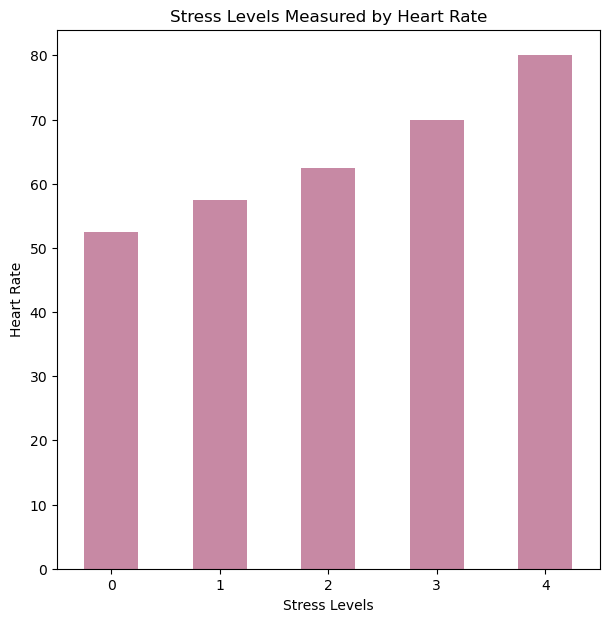

In [22]:
# Let's plot bar chart

fig, ax = plt.subplots(figsize=(7,7))
df.groupby(df["stress_level"])["heart_rate"].mean().plot(kind='bar', rot=0, color='#c789a4')
plt.title("Stress Levels Measured by Heart Rate")
plt.xlabel("Stress Levels")
plt.ylabel("Heart Rate")
plt.show()

**At what average heart rate do people score low stress levels?**
* The average heart rate at which people report no stress levels is 53bpm. A healthy lifestyle consiting of optimal exercise and controlled diet would help in achieving this.

***FIN***